<a href="https://colab.research.google.com/github/blayk11/segmentacao-clientes-kmeans/blob/main/pipeline_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Objetivo:
-  Hands-on: scikit-learn — construir pipeline simples (preprocessamento + clusterização) em Python (notebook)

Preparação de Ambiente

In [1]:
# Instalação de bibliotecas
pip install pandas scikit-learn matplotlib seaborn kaggle

Carregar Dataset Público do **Kaggle**

In [8]:
# Importa as bibliotecas necessárias
import kagglehub # Acesso aos datasets do Kaggle
import pandas as pd # Manipulação e análise de dados
import os # Operações do sistema de arquivos

# Baixar o dataset diretamente do Kaggle
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

# Caminho completo do arquivo CSV
csv_path = os.path.join(path, "Mall_Customers.csv")

# Carregar os dados
df = pd.read_csv(csv_path)

#Visualizar os primeiros registros
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Pré-processamento de Dados

In [13]:
# Selecionar as variáveis relevantes para clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalizar os dados garantindo que todas as variáveis tenham o mesmo peso no clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verificar se está tudo correto
import numpy as np
# Mostrar os 5 primeiros registros normalizados
print(np.round(X_scaled[:5], 2))



[[-1.42 -1.74 -0.43]
 [-1.28 -1.74  1.2 ]
 [-1.35 -1.7  -1.72]
 [-1.14 -1.7   1.04]
 [-0.56 -1.66 -0.4 ]]


EDA (Análise Exploratória de Dados)
- Distribuição de idade, renda e score de gastos

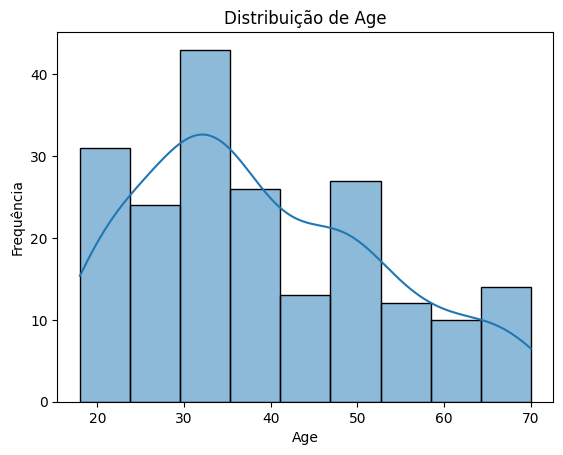

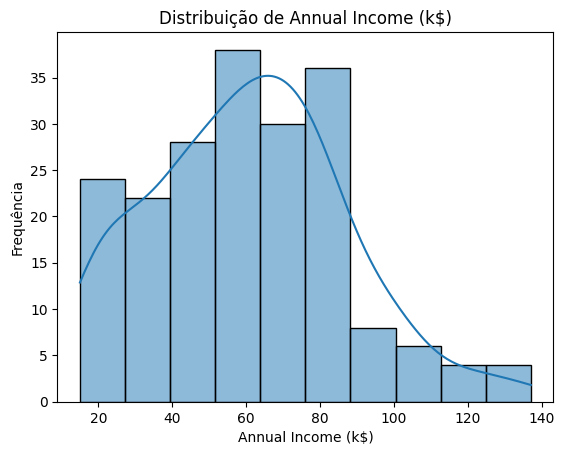

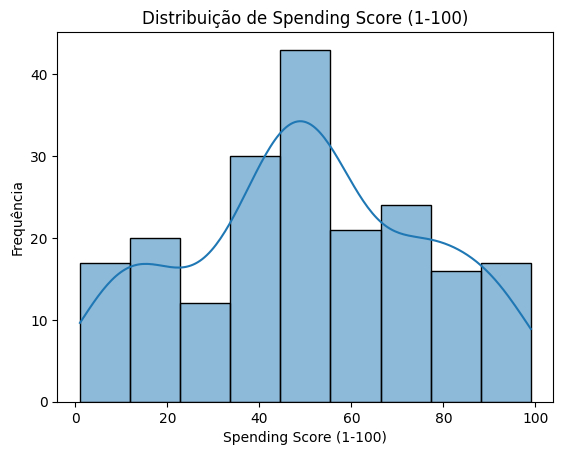

In [16]:
# Importa as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma para cada variável
for col in X.columns:
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribuição de {col}')
  plt.xlabel(col)
  plt.ylabel('Frequência')
  plt.show()

Aplicar K-Means

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42) # Valor de k encontrado com o método do cotovelo
kmeans.fit(X_scaled)
labels = kmeans.labels_
df['Cluster'] = labels

# Validação dos clusters
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, labels)
print(f'Silhoutte Score: {score:.2f}')

Silhoutte Score: 0.41


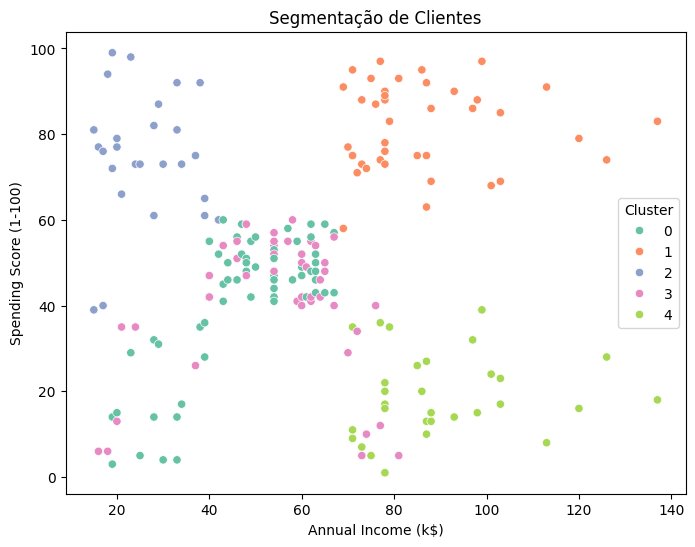

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set2')
plt.title('Segmentação de Clientes')
plt.show()

teste

In [41]:
# Média das variáveis por cluster
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.3,47.6,41.7
1,32.9,86.1,81.5
2,25.8,26.1,74.8
3,26.7,54.3,40.9
4,44.4,89.8,18.5


In [43]:
# Número de clientes por cluster
df['Cluster'].value_counts().sort_index()

,count
Cluster,
0,58
1,40
2,26
3,45
4,31
